 Data Visualization I
 1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data. 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/home/ap3x/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


/home/ap3x/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ap3x/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ap3x/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/ap3x/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0, 0.5, 'Count')

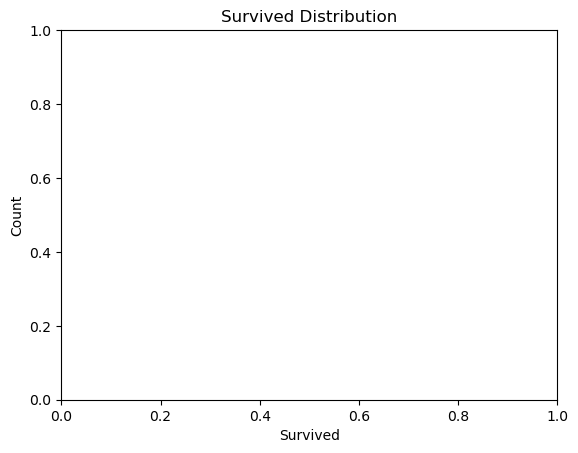

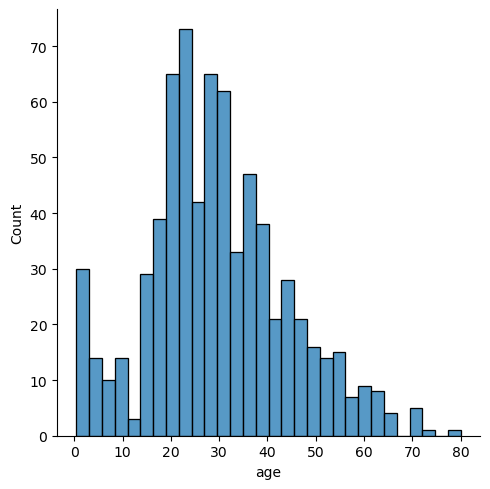

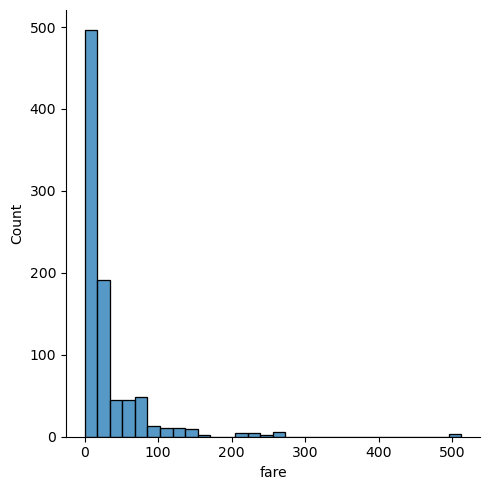

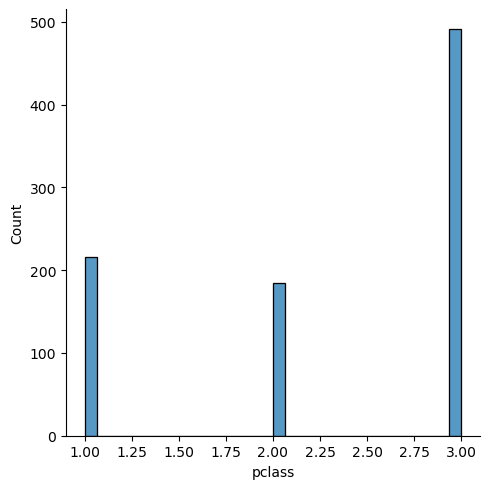

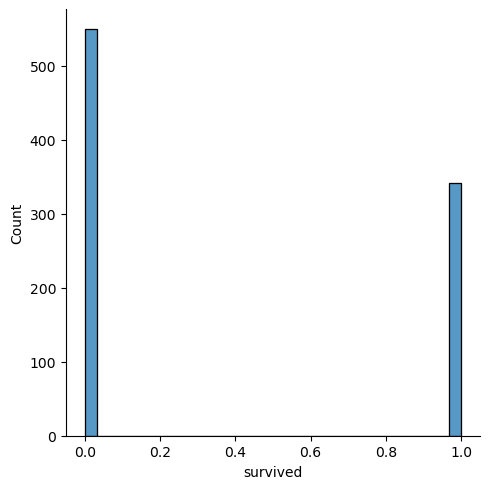

In [15]:
fig, ax = plt.subplots() 
sns.displot(df['age'].dropna(), kde=False, bins=30, ax=ax) 
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

sns.displot(df['fare'], kde=False, bins=30) 
ax.set_title('Fare Distribution')
ax.set_xlabel('Fare')
ax.set_ylabel('Count')

sns.displot(df['pclass'], kde=False, bins=30) 
ax.set_title('Pclass Distribution')
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')

sns.displot(df['survived'], kde=False, bins=30) 
ax.set_title('Survived Distribution')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

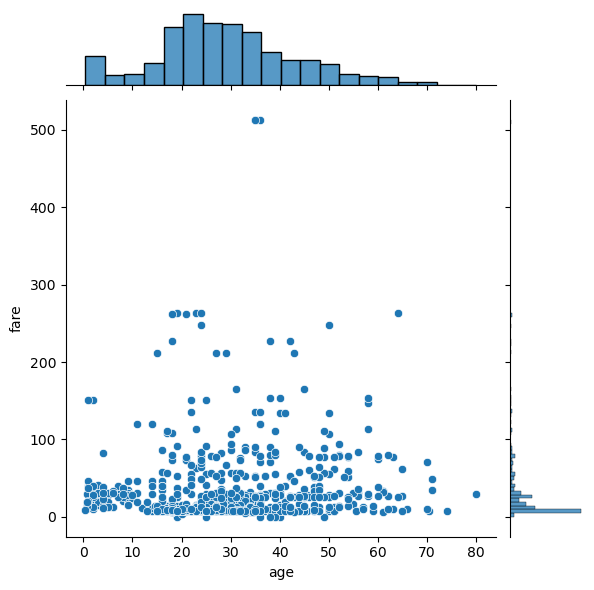

In [17]:
sns.jointplot(x = df['age'], y = df['fare'], kind =
'scatter')

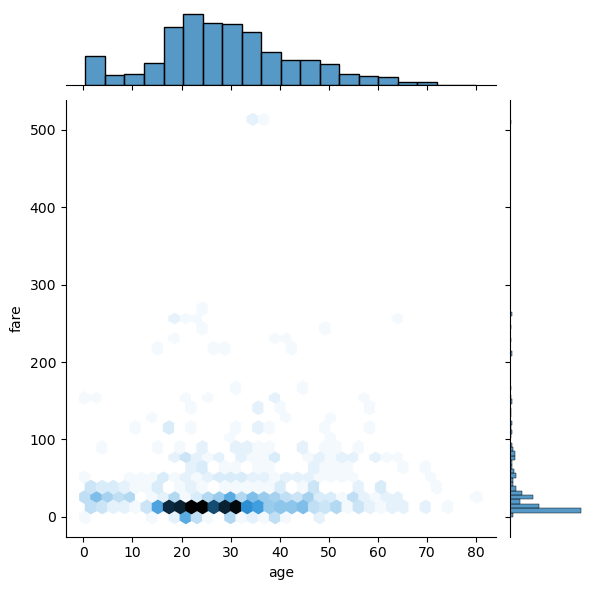

In [19]:
sns.jointplot(x = df['age'], y = df['fare'], kind = 'hex')

<Axes: xlabel='sex', ylabel='age'>

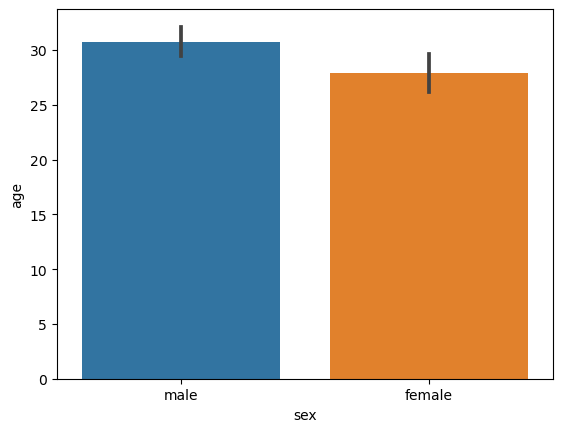

In [21]:
sns.barplot(x='sex', y='age', data=df)

<Axes: xlabel='sex', ylabel='fare'>

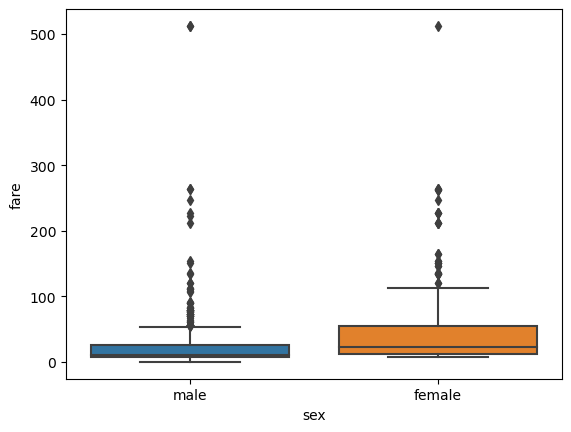

In [26]:
sns.boxplot(x='sex', y='fare', data=df)

<Axes: xlabel='sex', ylabel='age'>

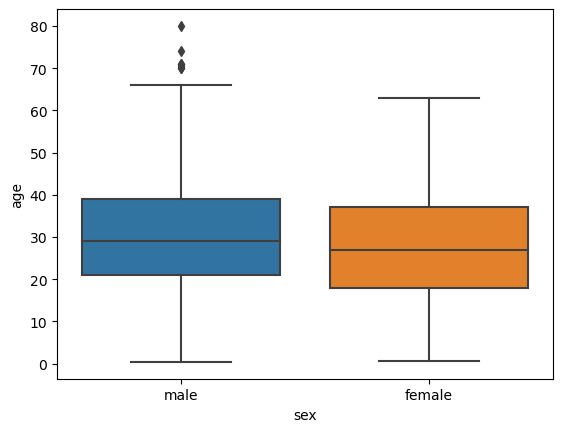

In [23]:
sns.boxplot(x='sex', y='age', data=df)


<Axes: xlabel='sex', ylabel='age'>

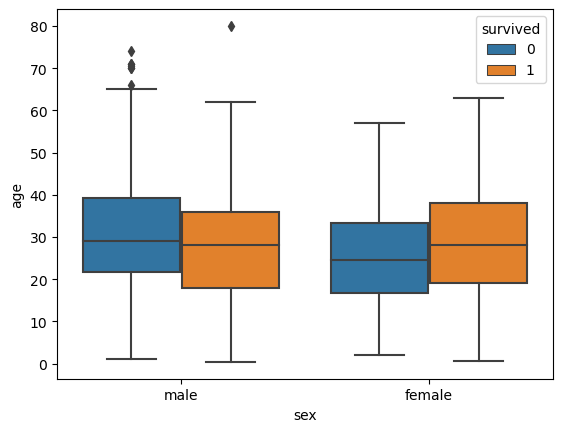

In [27]:
sns.boxplot(x='sex', y='age', data=df, hue="survived")

In [28]:
# drop columns that are not needed 
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who'])

In [35]:
sex = {"male":0,'female':1} 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,True,True


In [40]:
# df['sex'] = df['sex'].map({'male':1,'female':0})
df['class'] = df['class'].map({'First':1,'Second':2,'Third':3}) 
df['adult_male'] = df['adult_male'].map({True:1,False:0}) 
df['alone'] = df['alone'].map({True:1,False:0}) 
df['embarked'] = df['embarked'].map({'S':1,'C':2,'Q':3}) 

In [41]:
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,1.0,3,1,0
1,1,1,0,38.0,1,0,71.2833,2.0,1,0,0
2,1,3,0,26.0,0,0,7.9250,1.0,3,0,1
3,1,1,0,35.0,1,0,53.1000,1.0,1,0,0
4,0,3,1,35.0,0,0,8.0500,1.0,3,1,1


<Axes: >

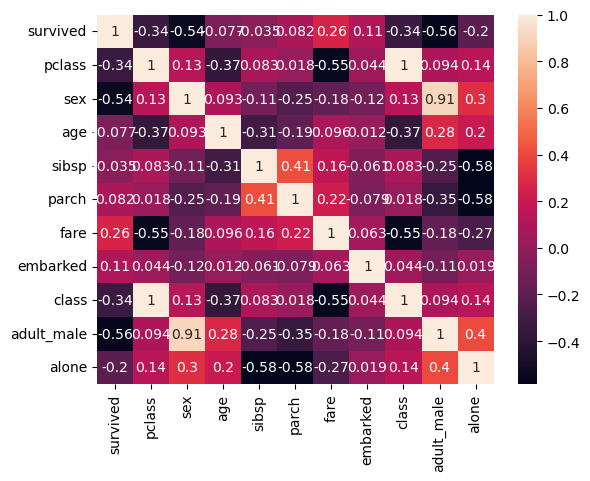

In [44]:
corr = df.corr() 

sns.heatmap(corr, annot=True)  